## Swarm-violin plot

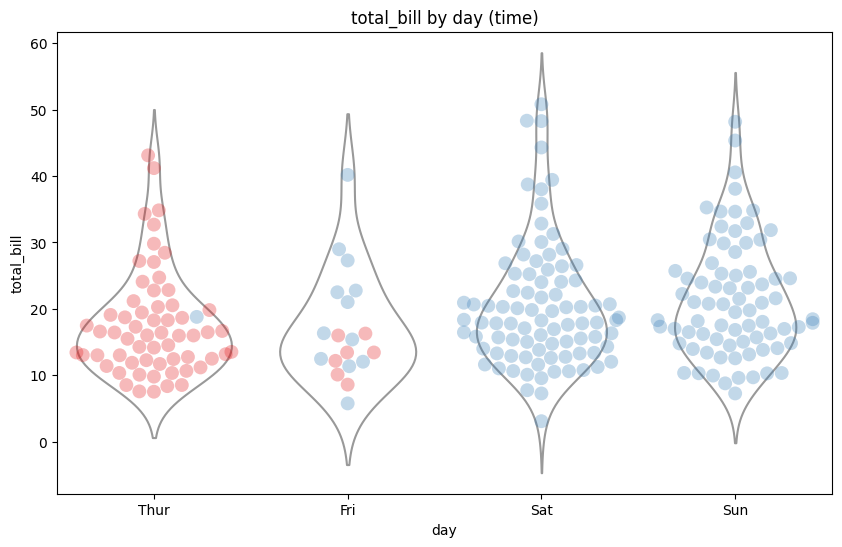

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

def generate_swarm_violin(data, x, y, hue):
    
    # Set figure size
    plt.figure(figsize=(10,6))

    # Create the beeswarm plot with different colors for each day and time
    ax = sns.swarmplot(x=x, y=y, data=data, palette="Set1", hue=hue, alpha=0.3, size=10)

    # Add violin plot to the same axes
    sns.violinplot(x=x, y=y, data=data, inner=None, color="white", ax=ax)

    # Hide the legend
    ax.legend_.remove()

    # Add title and labels
    plt.title(f"{y} by {x} ({hue})")
    plt.xlabel(x)
    plt.ylabel(y)

    # Show the plot
    plt.show()


generate_swarm_violin(data=tips, x="day", y="total_bill", hue="time")


## Strip-violin plot

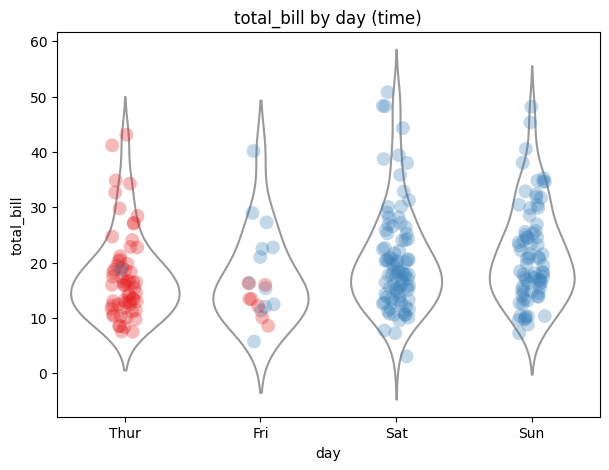

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

def generate_strip_violin(data, x, y, hue):
    # Set figure size
    plt.figure(figsize=(7,5))

    # Create the strip plot with different colors for each category
    ax = sns.stripplot(x=x, y=y, data=data, palette="Set1", hue=hue, alpha=0.3, size=10)

    # Add violin plot to the same axes
    sns.violinplot(x=x, y=y, data=data, inner=None, color="white", ax=ax)

    # Hide the legend
    ax.legend_.remove()

    # Add title and labels
    plt.title(f"{y} by {x} ({hue})")
    plt.xlabel(x)
    plt.ylabel(y)

    # Show the plot
    plt.show()


# Load the data
tips = sns.load_dataset("tips")

generate_strip_violin(data=tips, x="day", y="total_bill", hue="time")

## Strip-violin plot with percentage of category

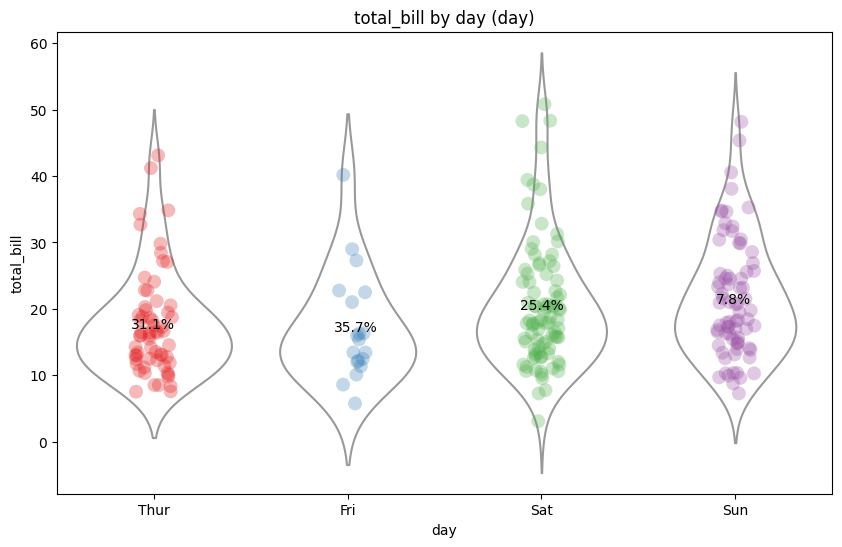

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

def generate_strip_violin(data, x, y, hue):
    # Set figure size
    plt.figure(figsize=(10, 6))

    # Create the strip plot with different colors for each category
    ax = sns.stripplot(x=x, y=y, data=data, palette="Set1", hue=hue, alpha=0.3, size=10)

    # Add violin plot to the same axes
    sns.violinplot(x=x, y=y, data=data, inner=None, color="white", ax=ax)

    # Get unique categories in the hue variable
    unique_categories = data[hue].unique()

    # Add percentage labels to the plot for each category
    for i, category in enumerate(unique_categories):
        # Get the collection for the current category
        collection = ax.collections[i]
        
        # Get the x and y positions of the points
        x_pos = collection.get_offsets()[:, 0]
        y_pos = collection.get_offsets()[:, 1]

        # Calculate the percentage of the category in the data
        percentage = len(data.loc[(data[x] == category) & (data[hue] == category)]) / len(data) * 100
        text = f"{percentage:.1f}%"
        ax.annotate(text, xy=(x_pos.mean(), y_pos.mean()), fontsize=10, ha='center', va='center')
        

    # Hide the legend
    ax.legend_.remove()

    # Add title and labels
    plt.title(f"{y} by {x} ({hue})")
    plt.xlabel(x)
    plt.ylabel(y)

    # Show the plot
    plt.show()
    

# Load the data
tips = sns.load_dataset("tips")

generate_strip_violin(data=tips, x="day", y="total_bill", hue="day")


## Strip-violin plot 

- add percentage of category
- add mean value
- add line graph

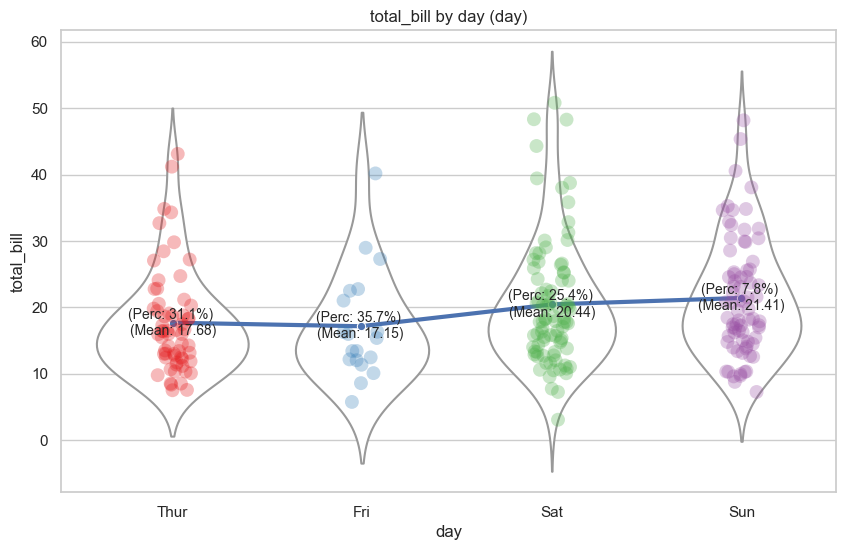

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

def generate_strip_violin(data, x, y, hue):
    # Set figure size
    plt.figure(figsize=(10, 6))

    # Create the strip plot with different colors for each category
    ax = sns.stripplot(x=x, y=y, data=data, palette="Set1", hue=hue, alpha=0.3, size=10)

    # Add violin plot to the same axes
    sns.violinplot(x=x, y=y, data=data, inner=None, color="white", ax=ax)

    # Get unique categories in the hue variable
    unique_categories = data[hue].unique()

    # Add percentage labels to the plot for each category
    xline = []
    yline = []
    for i, category in enumerate(unique_categories):
        # Get the collection for the current category
        collection = ax.collections[i]
        
        # Get the x and y positions of the points
        x_pos = collection.get_offsets()[:, 0]
        y_pos = collection.get_offsets()[:, 1]
        xline.append(x_pos.mean())
        # Calculate the percentage of the category in the data
        percentage = len(data.loc[(data[x] == category) & (data[hue] == category)]) / len(data) * 100
        
        # Calculate the mean of the 'numeric_column' within the current category
        mean_value = data[data[hue] == category][y].mean()        
        yline.append(y_pos.mean())
        #text = f"{percentage:.1f}%"
        text = f"(Perc: {percentage:.1f}%) \n(Mean: {y_pos.mean():.2f})"
        ax.annotate(text, xy=(x_pos.mean(), y_pos.mean()), fontsize=10, ha='center', va='center')
        
    sns.lineplot(x=xline, y=yline, markers=True, linewidth=3, dashes = True, marker='o')
    
    # Hide the legend
    ax.legend_.remove()

    # Add title and labels
    plt.title(f"{y} by {x} ({hue})")
    plt.xlabel(x)
    plt.ylabel(y)

    # Show the plot
    plt.show()

# Load the data
tips = sns.load_dataset("tips")

generate_strip_violin(data=tips, x="day", y="total_bill", hue="day")


## Plot correlation between 2 categorical variables

In [125]:
import pandas as pd
import numpy as np

# Generate random data
np.random.seed(0)

# Number of data points
n = 1000

# Create a DataFrame
data = pd.DataFrame({
    'ltv': np.random.uniform(0, 1, n),  # Random 'ltv' values between 0 and 1
    'rating': np.random.choice(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], n)
})

# Calculate the 'ltv_decile' using quantiles
decile_labels = [f'[{i/10:.1f}, {(i+1)/10:.1f})' for i in range(10)]
data['ltv_decile'] = pd.qcut(data['ltv'], 10, labels=decile_labels)

# Display the first few rows of the DataFrame
print(data.head())


        ltv rating  ltv_decile
0  0.548814      B  [0.5, 0.6)
1  0.715189      G  [0.7, 0.8)
2  0.602763      F  [0.6, 0.7)
3  0.544883      E  [0.5, 0.6)
4  0.423655      E  [0.4, 0.5)


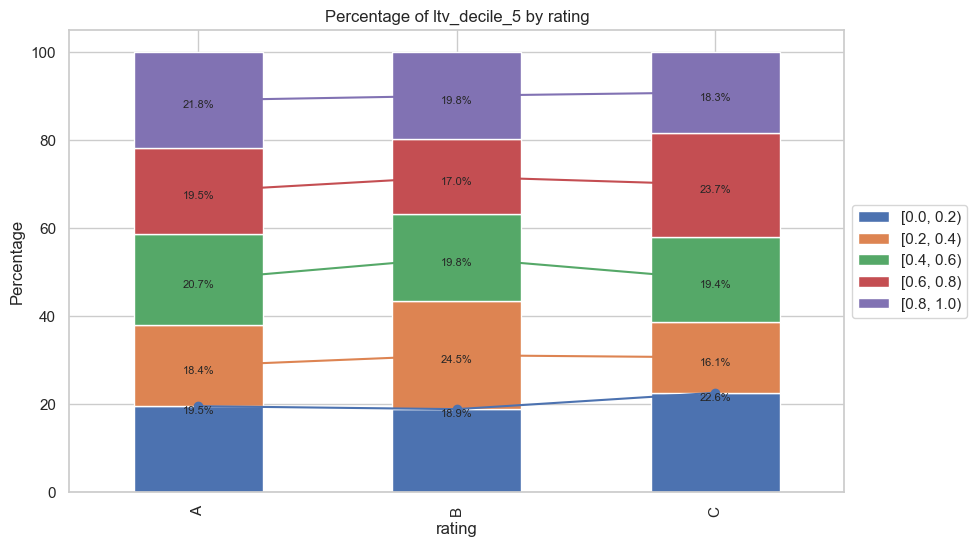

In [264]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_rating_ltv(data, category_var, numeric_var, num_quantiles, list_categories):
    # Make a copy of the input data and filter it based on the list of categories
    data = data.copy()
    data = data[data[category_var].isin(list_categories)]
    
    # Generate the 'decile' column name based on numeric_var and num_quantiles
    decile_col_name = f'{numeric_var}_decile_{num_quantiles}'
    
    # Calculate the 'decile' using quantiles and the generated column name
    decile_labels = [f'[{i/num_quantiles:.1f}, {(i+1)/num_quantiles:.1f})' for i in range(num_quantiles)]
    data[decile_col_name] = pd.qcut(data[numeric_var], num_quantiles, labels=decile_labels)

    # Group the data by 'rating' and 'ltv_decile' and count the occurrences
    rating_ltv_counts = data.groupby([category_var, decile_col_name]).size().unstack(fill_value=0)

    # Normalize the counts to percentages within each 'rating' group
    rating_ltv_percentages = rating_ltv_counts.div(rating_ltv_counts.sum(axis=1), axis=0) * 100

    # Normalize the counts to cumulative percentages within each 'rating' group
    rating_ltv_cumulative = rating_ltv_counts.cumsum(axis=1).div(rating_ltv_counts.sum(axis=1), axis=0) * 100

    rating_ltv_position = rating_ltv_cumulative.rolling(window=2, axis=1, min_periods=1, center=True).mean().fillna(0)

    # Plot a bar chart
    ax = rating_ltv_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Add percentage labels to each segment
    for column_name, column in rating_ltv_position.items():
        for x, y in enumerate(column):
            if y != 0:  # Exclude labels for segments with 0%
                percentage = rating_ltv_percentages[column_name].values[x]
                ax.text(x, y, f'{percentage:.1f}%', ha='center', va='top', fontsize=8)

    ax.set_ylabel("Percentage")
    ax.set_xlabel(category_var)
    ax.set_title(f"Percentage of {decile_col_name} by {category_var}")

    # Move the legend to the right
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Add line plots for each category
    for category in rating_ltv_position.columns:
        x = rating_ltv_percentages[category]
        y = rating_ltv_position[category]
        ax.plot(x.index, y.values, label=f'{category_var} {category}', marker='o')

    # Display the plot
    plt.show()

# Example usage:
plot_rating_ltv(data, 'rating', 'ltv', 5, ['A', 'B', 'C'])
